# Working with complicated dataset

Your name:

### Question 1

blast_results: https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv

Read in the data from the csv file above. Skip all the comment lines, create a header for the dataframe based on the fields list in the comment line that starts with **# Fields:**. Drop the first column `query acc.ver`. Set the `subject acc.ver` as the index of the dataframe. The last column of the dataframe should be `publications`. Show the first five rows of the resulting dataframe.

In [69]:
import pandas as pd
import requests
from io import StringIO

# URL of the dataset
url = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv"

# Read the raw data from the URL
response = requests.get(url)
data = response.text

# Split the data into lines
lines = data.split('\n')

# Extract the header from the comment line that starts with '# Fields:'
header_line = None
for line in lines:
    if line.startswith('"# Fields:'):
        header_line = line.replace('"# Fields:', '').strip()
        break

# Ensure header_line is not None
if header_line is None:
    raise ValueError("Header line not found")

# Split the header into columns and clean up the array
header = [col.strip() for col in header_line.split(',') if col.strip()]

# Ensure the header stops at 'publications'
if 'publications' in header:
    header = header[:header.index('publications') + 1]

# Print the extracted header for debugging
print(f"Extracted header: {header}")

# Check for duplicate column names
if len(header) != len(set(header)):
    duplicates = [col for col in header if header.count(col) > 1]
    raise ValueError(f"Duplicate column names found in the header: {duplicates}")

# Filter out comment lines and join the remaining lines
filtered_data = '\n'.join([line for line in lines if not line.startswith('#') and line.strip() != ''])

# Read the filtered data into a dataframe
df = pd.read_csv(StringIO(filtered_data), header=None)


# Set the correct header
if len(df.columns) > len(header):
    df = df.iloc[:, :len(header)]  # Trim extra columns if any
elif len(df.columns) < len(header):
    raise ValueError("Data columns are fewer than header columns")

df.columns = header

# Drop the first column 'query acc.ver'
df.drop(columns=['query acc.ver'], inplace=True)

# Set 'subject acc.ver' as the index
df.set_index('subject acc.ver', inplace=True)

# Ensure the last column is 'publications'
df.columns = [col.strip().strip('"') for col in df.columns]  # Clean up column names again if necessary

# Clean up the 'publications' column
df['publications'] = df['publications'].str.replace(',', '').str.strip()

df.head()


Extracted header: ['query acc.ver', 'subject acc.ver', '% identity', 'alignment length', 'mismatches', 'gap opens', 'q. start', 'q. end', 's. start', 's. end', 'evalue', 'bit score', '% positives', 'bonds', 'publications"']


,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,% positives,bonds,publications
subject acc.ver,,,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NP_904328.1,100.000,318.0,0.0,0.0,1.0,318.0,1.0,318.0,0.0,629.0,100.00,"1,487",9
AGK29621.1,99.686,318.0,1.0,0.0,1.0,318.0,1.0,318.0,0.0,629.0,100.00,"17,947",47
YP_220563.1,99.686,318.0,1.0,0.0,1.0,318.0,1.0,318.0,0.0,627.0,100.00,"12,106",13
ACM24502.1,99.686,318.0,1.0,0.0,1.0,318.0,1.0,318.0,0.0,627.0,99.69,"2,319",41


### Question 2
What is the average number of publications?

In [70]:

# Convert 'publications' column to float, coercing errors to NaN
df['publications'] = pd.to_numeric(df['publications'], errors='coerce')

# Drop rows with NaN values in 'publications'
df = df.dropna(subset=['publications'])

# Calculate the average number of publications
average_publications = df['publications'].mean()
print(f"Average number of publications: {average_publications}")

df.head()

Average number of publications: 26.989690721649485


,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,% positives,bonds,publications
subject acc.ver,,,,,,,,,,,,,
NP_904328.1,100.000,318.0,0.0,0.0,1.0,318.0,1.0,318.0,0.0,629.0,100.00,"1,487",9.0
AGK29621.1,99.686,318.0,1.0,0.0,1.0,318.0,1.0,318.0,0.0,629.0,100.00,"17,947",47.0
YP_220563.1,99.686,318.0,1.0,0.0,1.0,318.0,1.0,318.0,0.0,627.0,100.00,"12,106",13.0
ACM24502.1,99.686,318.0,1.0,0.0,1.0,318.0,1.0,318.0,0.0,627.0,99.69,"2,319",41.0
AHG32084.1,99.371,318.0,2.0,0.0,1.0,318.0,1.0,318.0,0.0,627.0,100.00,"18,964",3.0


### Question 3
List the `subject acc.ver` that has over 15,000 bonds.

In [75]:



# Convert 'bonds' column to float, coercing errors to NaN
df['bonds'] = pd.to_numeric(df['bonds'], errors='coerce')

# Drop rows with NaN values in 'bonds'
df = df.dropna(subset=['bonds'])

# Convert 'bonds' column to int
df['bonds'] = df['bonds'].astype(int)

# List the `subject acc.ver` that has over 15,000 bonds
subjects_over_15000 = df[df['bonds'] > 15000].index.tolist()
print(f"Subjects with over 15,000 bonds: {subjects_over_15000}")


Subjects with over 15,000 bonds: ['AGK29621.1', 'AHG32084.1', '6G2J_H', 'YP_002791042.1', 'AGK29634.1', '0806162F', 'YP_009112408.1', 'YP_001876469.1', 'YP_009092269.1', 'AHG32149.1', 'YP_009092074.1', 'YP_009450474.1', 'YP_004123270.1', 'YP_009092073.1', 'AHZ60901.1', 'YP_004123350.1', 'YP_009453754.1', 'ADD46492.1', 'YP_009453806.1', 'YP_007024956.1', 'ASM92364.1', 'YP_006073044.1', 'ASM92494.1', 'ADG95699.1', 'YP_004891275.1', 'YP_009166014.1', 'YP_009538416.1', 'YP_009414182.1', 'YP_009178854.1', 'YP_009414415.1', 'YP_009353908.1', 'YP_009093743.1', 'ABX45285.1', 'YP_009414156.1', 'YP_009414363.1']


### Question 4
Create a plot that shows the correlation between `% identity` and `% positives`.



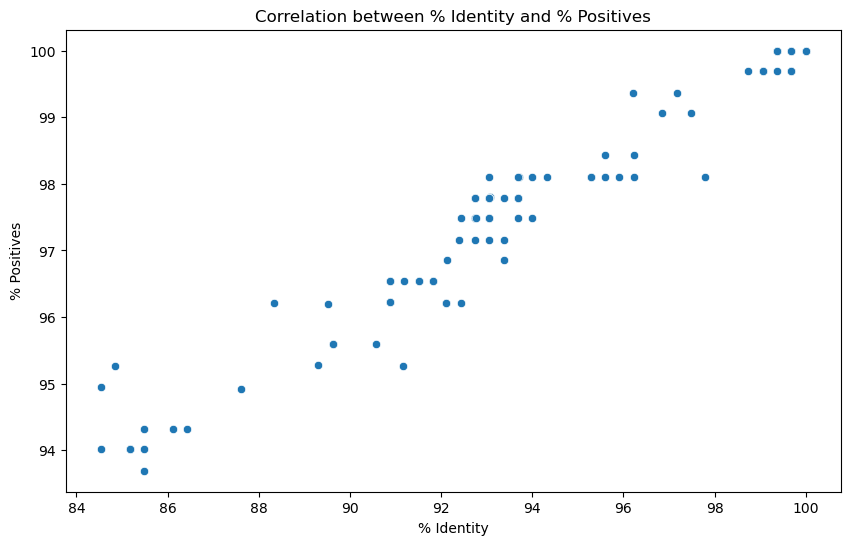

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot to show the correlation between '% identity' and '% positives'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='% identity', y='% positives', data=df)
plt.title('Correlation between % Identity and % Positives')
plt.xlabel('% Identity')
plt.ylabel('% Positives')
plt.show()

### Question  5
Add a column `Protein source` to the dataframe from Question 1 based on the data in this csv file: https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv. Merge the data when the `subject acc.ver` from the dataframe equals to `Protein` in the csv file. Entries without a matching protein will have `NA` as `Protein source`.

In [80]:
# URL of the protein source dataset
protein_source_url = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv"

# Read the protein source data
protein_source_df = pd.read_csv(protein_source_url)

# Merge the dataframes on 'subject acc.ver' and 'Protein'
merged_df = df.reset_index().merge(protein_source_df, how='left', left_on='subject acc.ver', right_on='Protein')

# Set 'subject acc.ver' back as the index
merged_df.set_index('subject acc.ver', inplace=True)

# Fill missing 'Protein source' values with 'NA'
merged_df['Source'].fillna('NA', inplace=True)

# Show the first few rows of the merged dataframe
print(merged_df.head())

                 % identity  alignment length  mismatches  gap opens  \
subject acc.ver                                                        
NP_904328.1         100.000             318.0         0.0        0.0   
AGK29621.1           99.686             318.0         1.0        0.0   
YP_220563.1          99.686             318.0         1.0        0.0   
ACM24502.1           99.686             318.0         1.0        0.0   
AHG32084.1           99.371             318.0         2.0        0.0   

                 q. start  q. end  s. start  s. end  evalue  bit score  \
subject acc.ver                                                          
NP_904328.1           1.0   318.0       1.0   318.0     0.0      629.0   
AGK29621.1            1.0   318.0       1.0   318.0     0.0      629.0   
YP_220563.1           1.0   318.0       1.0   318.0     0.0      627.0   
ACM24502.1            1.0   318.0       1.0   318.0     0.0      627.0   
AHG32084.1            1.0   318.0       1.0   318.0

C:\Users\Aaron\AppData\Local\Temp\ipykernel_10252\3858675275.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['Source'].fillna('NA', inplace=True)
